### 목차
- 이벤트
  - event 객체
  - event handler
- 버블링
  - 캡처링과 버블링
  - 버블링의 필요성
- event handler 활용
  - 이벤트 기본 동작 취소하기
- 참고
  - addEvenListener와 화살표 함수 관계

# 이벤트
- 웹에서의 모든 동작은 이벤트 발생과 함께 한다.
- 무언가 일어났다는 신호, 사건
- 모든 DOM 요소는 이러한 event를 만들어냄
## 'event' object
- DOM에서 이벤트가 발생했을 때 생성되는 객체
- DOM 요소에서 event가 발생하면,해당 event는 연결된 이벤트 처리기(event handler)에 의해 처리됨

# event handler
- 특정 이벤트가 발생했을 때 실행되는 함수
- 사용자의 행동에 어떻게 반응할지를 Javascript 코드로 표현한 것


## addEventListener
- DOM객체.addEventListener(행동, 이벤트)
- 대표적인 이벤트 핸들러 중 하나
- 특정 이벤트를 DOM 요소가 수신할 때마다 콜백 함수를 호출
  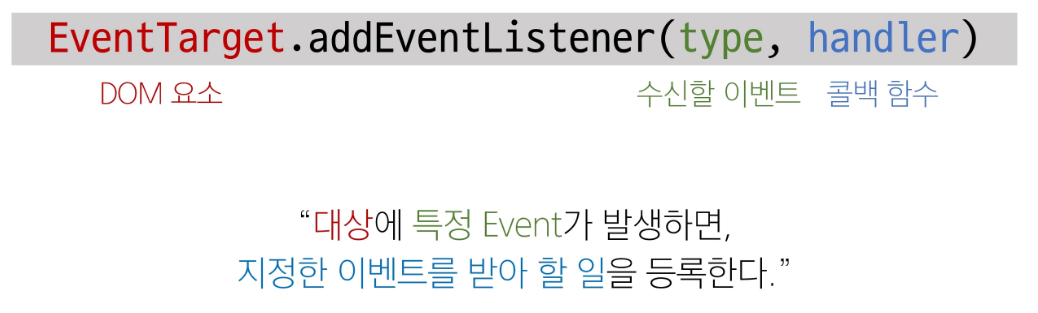
 - 대상에 특정 Event가 발생하면, 지정한 이벤트를 받아 할일을 등록한다.

### addEventListener의 인자
- `.addEventListener(type,handler)`
```javascript
    element.addEventListener('click',function (event) {
      // 이벤트 처리 로직
    })
```
- type
  - 수신할 이벤트 이름
  - 문자열로 작성(ex. 'click')
- handler
  - 발생한 이벤트 객체를 수신하는 콜백 함수
  - 이벤트 핸들러는 자동으로 event 객체를 매개변수로 받음

### addEventListener 활용
- 버튼을 클릭하면 버튼 요소 출력하기
  - 버튼에 이벤트 처리기를 부착하여 클릭 이벤트가 발생하면 이벤트가 바생한 버튼 정보를 출력
- 요소에 addEventListener를 연결하게 되면 내부의 this 값은 연결된 요소를 가리키게 됨(event 객체의 currentTarget 속성 값과 동일)
```javascript

  <button id="btn">버튼</button>

  <script>
    // 1. 버튼 선택
    const btn = document.querySelector('#btn')


    // 2. 콜백 함수
    const detectClick = function(event) {
      console.log(event)
      console.log(event.currentTarget)
      console.log(event.target)
      console.log(this)
    }

    // 3. 버튼에 이벤트 핸들러를 부착
    btn.addEventListener('click', detectClick)

  </script>
```

  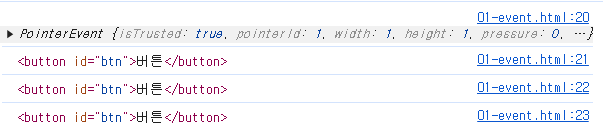

  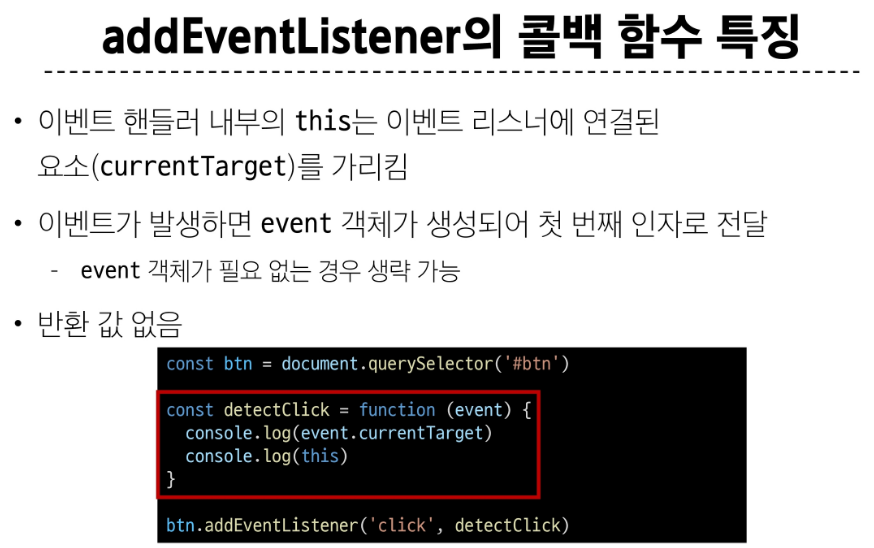


# 버블링
- 한 요소에 이벤트가 발생하면, 이 요소에 할당된 핸들러가 동작하고, 이어서 부모 요소의 핸들러가 동작하는 현상
- 가장 최상단의 조상 요소(document)를 만날 때까지 이 과정이 반복되면서 요소 각각에 할당된 핸들러가 동작
- 이벤트가 제일 깊은 곳에 있는 요소에서 시작해 부모 요소를 거슬러 올라가며 발생하는 것이 마치 물속 거품과 닮았기 때문에 버블링이라고 함
- 최하위 <p>요소를 클릭하면 p → div → form 순서로 3개의 이벤트 핸들러가 모두 순차적으로 동작했던 것

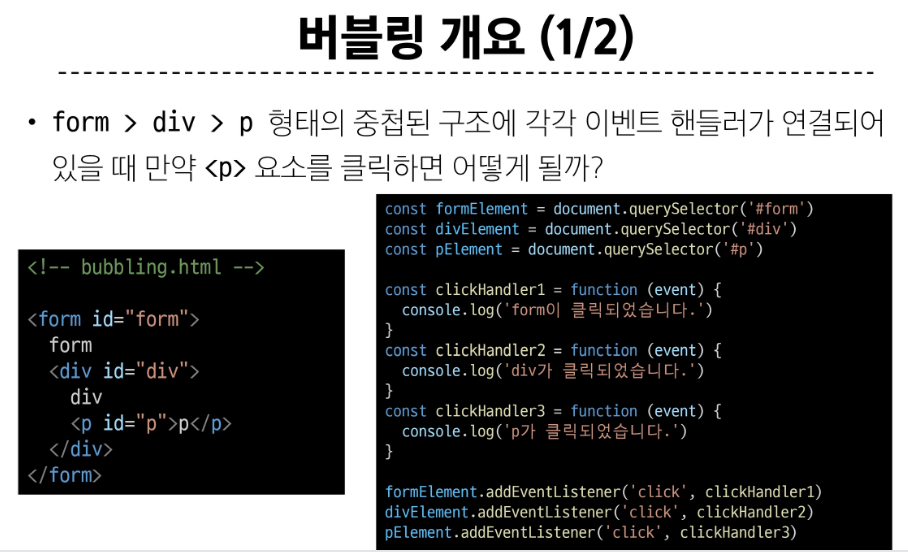
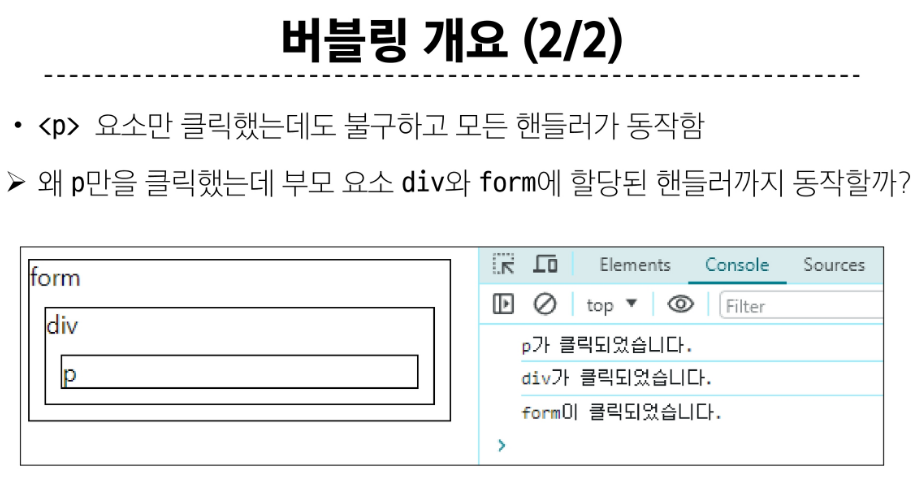
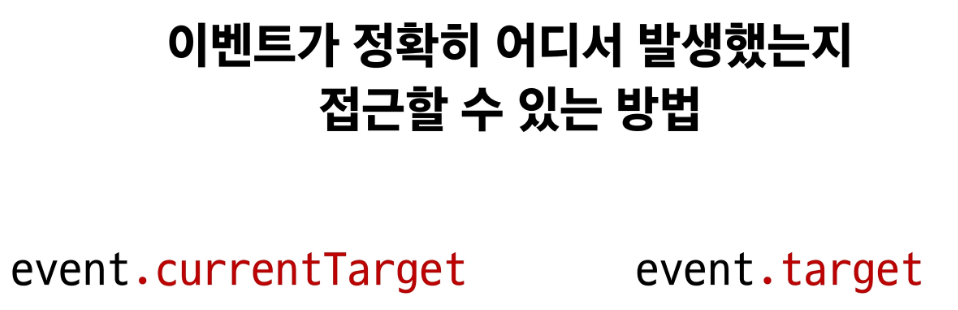

```javascript
  <form id="form">
    form
    <div id="div">
      div
      <p id="p">p</p>
    </div>
  </form>

  <script>
    const formElement = document.querySelector('#form')
    const divElement = document.querySelector('#div')
    const pElement = document.querySelector('#p')

    const clickHandler1 = function (event) {
      console.log('form이 클릭되었습니다.')
    }
    const clickHandler2 = function (event) {
      console.log('div가 클릭되었습니다.')
    }
    const clickHandler3 = function (event) {
      console.log('p가 클릭되었습니다.')
    }

    formElement.addEventListener('click', clickHandler1)
    divElement.addEventListener('click', clickHandler2)
    pElement.addEventListener('click', clickHandler3)
  </script>
```



# currentTarget & target 속성
- currentTarget 속성
  - '현재' 요소
  - 항상 이벤트 핸들러가 연결된 요소만을 참조하는 속성
  - currentTarget.addEvent~
  - 'this'와 같음

- target 속성
  - 이벤트가 발생한 가장 안쪽의 요소(target)를 참조하는 속성
  - 실제 이벤트가 시작된 요소
  - 버블링이 진행되어도 변하지 않음

```javascript
  <body>
    <div id="outerouter">
      outerouter
      <div id="outer">
        outer
        <div id="inner">inner</div>
      </div>
    </div>

    <script>
      const outerOuterElement = document.querySelector('#outerouter')
      const outerElement = document.querySelector('#outer')
      const innerElement = document.querySelector('#inner')

      const clickHandler = function (event) {
        console.log('currentTarget:', event.currentTarget.id)
        console.log('target:', event.target.id)
      }

      outerOuterElement.addEventListener('click', clickHandler)
    </script>
  </body>
```


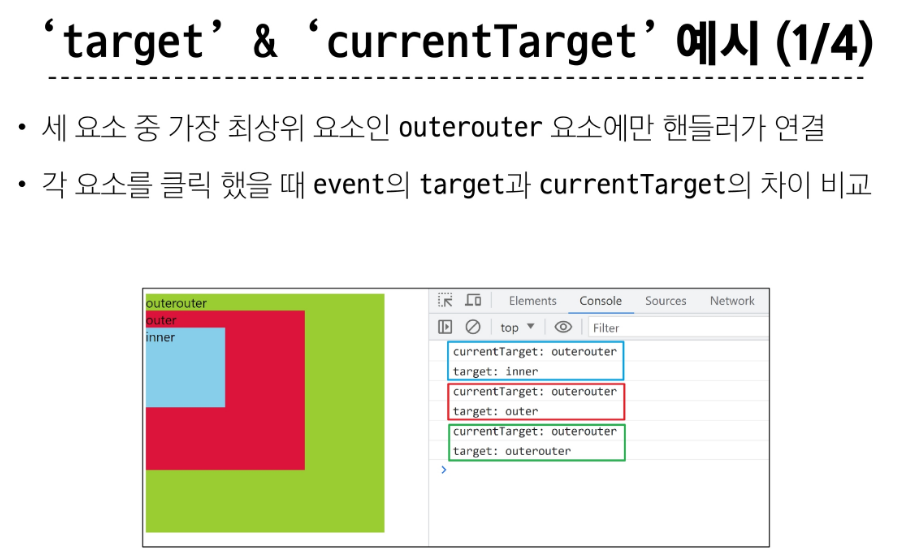
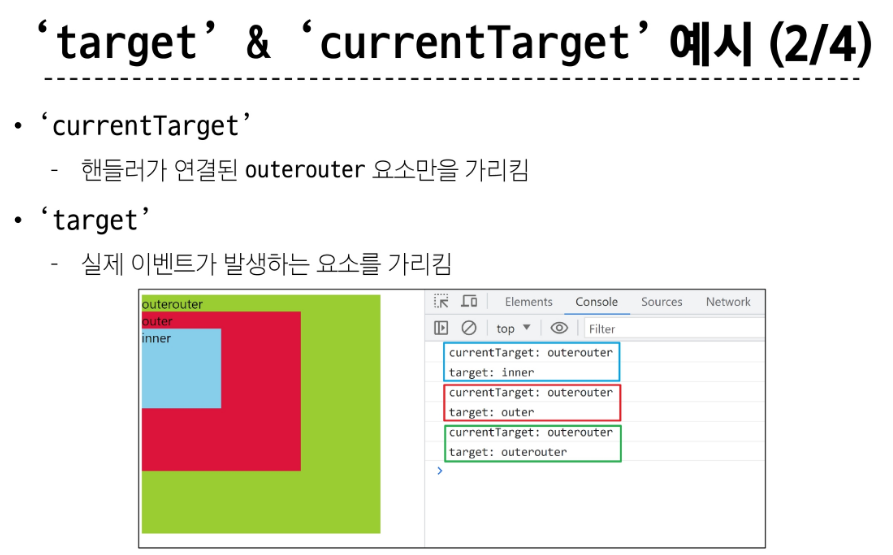
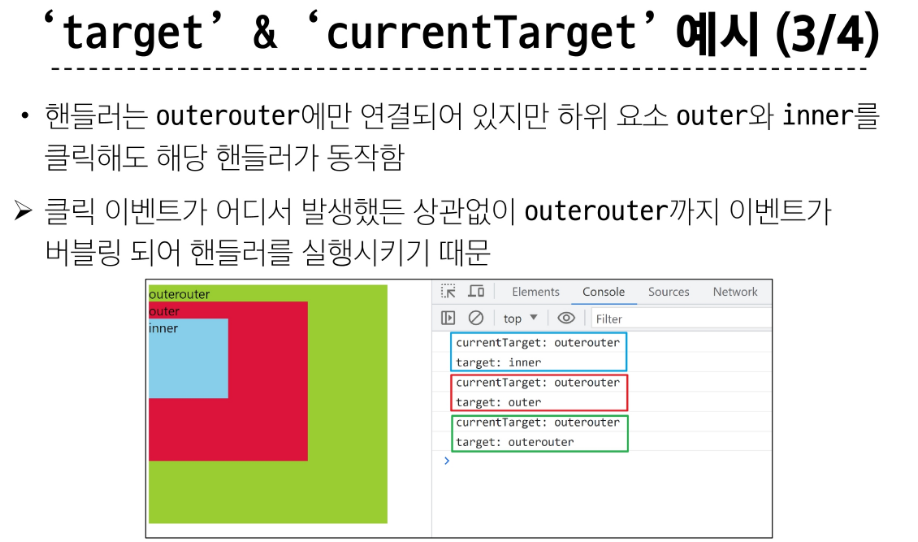

# 캡처링과 버블링
- 이벤트가 하위 요소로 전파되는 단계(버블링과 반대)
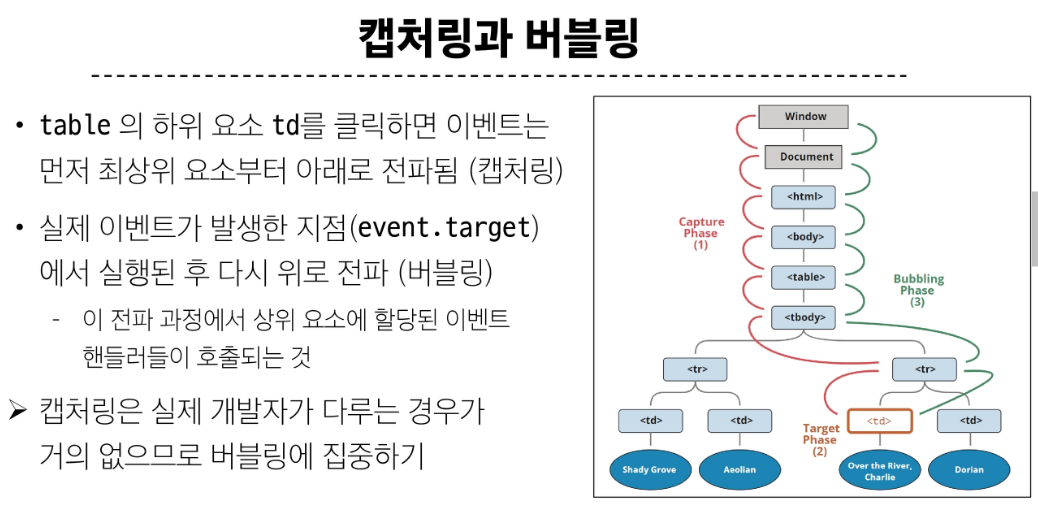

# 버블링의 필요성
- 만약 다음과 같이 각자 다른 동작을 수행하는 버튼이 여러 개가 있다고 가정
- 그렇다면 각 버튼마다 서로 다른 이벤트 핸들러를 할당해야 할까?
- **Nope! 어떤 버튼이 눌렸는지만 알면 됨**
- **각 버튼의 공통 조상인 div 요소에 이벤트 핸들러 단 하나만 할당하기**
- 요소의 공통 조상에 이벤트 핸들러를 단 하나만 할당하면, 여러 버튼 요소에서 발생하는 이벤트를 한꺼번에 다룰 수 있음
- 공통 조상에 할당한 핸들러에서 event.target을 이용하면 실제 어떤 버튼에서 이벤트가 발생했는지 알 수 있기 때문

```javascript
  <div>
    <button>버튼1</button>
    <button>버튼2</button>
    <button>버튼3</button>
    <button>버튼4</button>
    <button>버튼5</button>
  </div>
  <script>
    const divTag = document.querySelector('div')

    const clickHandler = function (event) {
      console.log(event.target)
    }

    divTag.addEventListener('click', clickHandler)
  </script>
```

# event handler 활용 실습
1. 버튼을 클릭하면 숫자를 1씩 증가해서 출력하기
2. 사용자 입력 값을 실시간으로 출력하기
3. 사용자 입력 값을 실시간으로 출력하기+버튼을 클릭하면 출력된 값의 CSS 스타일을 변경하기
4. todo 프로그램 구현
5. 로또 번호 생성기 구현

In [ ]:
// 1. 버튼을 클릭하면 숫자를 1씩 증가해서 출력하기
<body>
  <button id="btn">버튼</button>
  <p>클릭횟수 : <span id="counter">0</span></p>

  <script>
    //1. 초기값
    let countNumber = 0

    //2. 버튼 요소 선택
    const btn = document.querySelector('#btn')

    //3. 이벤트 핸들러의 콜백 함수
    const clickHandler = function(event) {
      // 3.1 초기값을 +1 증가
      countNumber += 1

      // 3.2 숫자를 콘텐츠로 가지고 있는 span 태그를 선택
      const spanTag = document.querySelector('#counter')

      // 3.3 span 태그의 콘텐츠 값을 countNumber 값으로 변경
      spanTag.textContent = countNumber
    }

    //4. 선택한 버튼에 이벤트 핸들러 부착
    btn.addEventListener('click',clickHandler)

  </script>
</body>

In [ ]:
// 2. 사용자 입력 값을 실시간으로 출력하기

<body>
  <input type="text" id="text-input">
  <p></p>

  <script>
    // 1. input 요소를 선택 (이벤트가 발생하는 지점)
    const inputTag = document.querySelector('#text-input')

    // 2. p 요소 선택
    const pTag = document.querySelector('p')

    // 3. 콜백 함수 (input 요소에 input 이벤트가 발생할 때마다 실행될 코드)
    const inputHandler = function(event) {
      // 3.1 이벤트 객체에서 사용자가 입력한 값을 찾아 저장
      // console.log(event)
      // console.log(event.currentTarget)
      // console.log(this)
      // console.log(event.currentTarget.value)
      // const inputData = event.currentTarget.value
      const inputData = this.value // 둘 다 같음

      // 3.2 선택한 p요소의 텍스트 콘텐츠에 할당
      pTag.textContent = inputData
    }

    // 4. 선택한 input 요소에 이벤트 핸들러를 부착
    inputTag.addEventListener('input', inputHandler)

  </script>
</body>

In [ ]:
// 3. 사용자 입력 값을 실시간으로 출력하기+버튼을 클릭하면 출력된 값의 CSS 스타일을 변경하기
<body>
  <h1></h1>
  <button id="btn">클릭</button>
  <input type="text" id="text-input">

  <script>
    //input 구현
    // 1. input & h1 요소 선택
    const inputTag = document.querySelector('#text-input')
    const h1Tag = document.querySelector('h1')

    // 1.2 콜백 함수
    const inputHandler = function (event) {
      // 1.2.1 사용자 입력 데이터 추출
      const inputData = event.currentTarget.value
      // 1.2.2 추출한 데이터를 h1 요소의 콘텐츠로 할당
      h1Tag.textContent = inputData
    }

    // 1.3 input 요소에 이벤트 핸들러 부착
    inputTag.addEventListener('input', inputHandler)

    // 2. 버튼 기능 구현
    // 2.1 버튼 요소 선택
    const btn = document.querySelector('#btn')

    // 2.2 콜백 함수
    const clickHandler = function (event) {
      // 2.2.1 h1 요소의 클래스 목록에 blue 문자열 추가
      h1Tag.classList.toggle('blue')
    }

    // 2.3 버튼에 이벤트 핸들러 부착
    btn.addEventListener('click',clickHandler)
  </script>
</body>

In [ ]:
// 4. todo 프로그램 구현

<body>
  <input type="text" class="input-text">
  <button id="btn">+</button>
  <ul></ul>

  <script>
    // 1. 필요한 요소들 일단 선택
    const inputTag = document.querySelector('.input-text')
    const btn = document.querySelector('#btn')
    const ulTag = document.querySelector('ul')

    // 2. 콜백 함수 (실제 todo 데이터를 생성 후 추가하는 로직)
    const addTodo = function(event) {
      // 2.1 사용자 입력 데이터 저장
      const inputData = inputTag.value

      // 2.2 li 태그를 생성
      const liTag = document.createElement('li')

      // 2.3 li 태그의 텍스트 콘텐츠로 사용자 입력데이터 할당
      liTag.textContent = inputData
      console.log(liTag)
      
      // 2.4 ul 태그의 자식 태그로 완성된 li태그를 자식으로 추가 
      ulTag.appendChild(liTag)

      // 2.5 todo 추가 후에 input에 작성한 데이터를 초기화
      inputTag.value = ''
    }

    // 3. 버튼에 이벤트 핸들러 부착
    btn.addEventListener('click', addTodo)


  </script>
</body>



In [ ]:
// 4.1 추가 기능 구현
// - 빈문자열 입력 방지
// - 입력이 없을 경우 경고 대화상자를 띄움

const addTodo = function(event) {
  const inputData = inputTag.value
  if (inputData.trim()) {
    const liTag = document.createElement('li')
    liTag.textContent = inputData
    ulTag.appendChild(liTag)
    inputTag.value = ''
  } else {
    alert('할 일을 입력하세요.')
  }
}


In [ ]:
// 5. 로또 번호 생성기 구현